In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
from utils.preprocessor import IUXrayPreprocessor
from constants import DATASETS_PATH, CHEXPERT_LABELS
from sklearn.model_selection import train_test_split

In [3]:
DATA_PATH = DATASETS_PATH['iu-xray']

In [3]:
reports = pd.read_csv(f'{DATA_PATH}/indiana_reports.csv')

print("Columns: " + reports.columns)
print("Number of reports: " + str(len(reports)))

Index(['Columns: uid', 'Columns: MeSH', 'Columns: Problems', 'Columns: image',
       'Columns: indication', 'Columns: comparison', 'Columns: findings',
       'Columns: impression'],
      dtype='object')
Number of reports: 3851


In [4]:
reports.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [5]:
print(reports.loc[291])

uid                                                         302
MeSH                                             Scoliosis/mild
Problems                                              Scoliosis
image                                 Xray Chest PA and Lateral
indication                             XXXX-year-old male, pain
comparison                                                  NaN
findings      Heart size within normal limits, stable medias...
impression                                    No acute findings
Name: 291, dtype: object


In [6]:
projections = pd.read_csv(f'{DATA_PATH}/indiana_projections.csv')

print("Columns: " + projections.columns)
print("Number of projections: " + str(len(projections)))

Index(['Columns: uid', 'Columns: filename', 'Columns: projection'], dtype='object')
Number of projections: 7466


In [7]:
projections.head()

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal


View 1 size: (2048, 2496)
View 2 size: (2496, 2048)


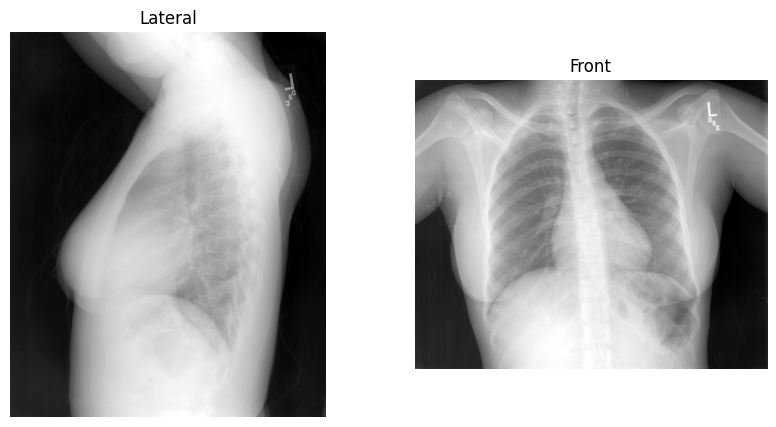

In [4]:
view1_path = f'{DATA_PATH}/images/images_normalized/1_IM-0001-3001.dcm.png'
view2_path = f'{DATA_PATH}/images/images_normalized/1_IM-0001-4001.dcm.png'

def get_image_size(image_path: str):
    with Image.open(image_path) as img:
        return img.size

view1 = mpimg.imread(view1_path)
view2 = mpimg.imread(view2_path)

print(f"View 1 size: {get_image_size(view1_path)}")
print(f"View 2 size: {get_image_size(view2_path)}")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(view1, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Lateral')
ax[1].imshow(view2, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Front')
plt.show()

In [12]:
reports['Report Impression'] = reports['findings'] + ' ' + reports['impression']

impressions = reports[['uid', 'Report Impression']].copy()
impressions.to_csv(f'{DATA_PATH}/indiana_impressions.csv', index=False)

,uid,Report Impression
0,1,The cardiac silhouette and mediastinum size ar...
1,2,Borderline cardiomegaly. Midline sternotomy XX...
2,3,"No displaced rib fractures, pneumothorax, or ..."
3,4,There are diffuse bilateral interstitial and a...
4,5,The cardiomediastinal silhouette and pulmonary...


In [8]:
labels = pd.read_csv(f'{DATA_PATH}/indiana_impressions.csv')
labels.rename(columns={'Report Impression': 'report'}, inplace=True)
labels = labels[['uid', 'report', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices']]
labels.to_csv(f'{DATA_PATH}/indiana_impressions.csv', index=False)

## Preprocess and set up the train, test and validation splits

In [41]:
# assigning the splits
# train_split, temp_split = train_test_split(iu_xray, test_size=0.3, random_state=42)
# val_split, test_split = train_test_split(temp_split, test_size=0.5, random_state=42)

def assign_split(uid):
    if uid in train_split['uid'].values:
        return 'train'
    elif uid in val_split['uid'].values:
        return 'val'
    else:
        return 'test'


# iu_xray["split"] = iu_xray["uid"].apply(assign_split)
# iu_xray.head()

,uid,MeSH,Problems,findings,impression,frontal_filename,lateral_filename,report,Atelectasis,Cardiomegaly,...,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,split
0,1,normal,normal,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,1_IM-0001-4001.dcm.png,1_IM-0001-3001.dcm.png,The cardiac silhouette and mediastinum size ar...,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,val
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,2_IM-0652-1001.dcm.png,2_IM-0652-2001.dcm.png,Borderline cardiomegaly. Midline sternotomy XX...,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
2,3,normal,normal,NaN,"No displaced rib fractures, pneumothorax, or p...",3_IM-1384-1001.dcm.png,3_IM-1384-2001.dcm.png,"No displaced rib fractures, pneumothorax, or ...",0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...",There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...,4_IM-2050-1001.dcm.png,4_IM-2050-2001.dcm.png,There are diffuse bilateral interstitial and a...,0.0,0.0,...,0.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,train
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.,5_IM-2117-1003002.dcm.png,5_IM-2117-1004003.dcm.png,The cardiomediastinal silhouette and pulmonary...,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,train


## Visualize the splits


In [3]:
def plot_class_distribution(df, title):
    label_counts = {label: df[label].replace(-1, 1).sum() for label in CHEXPERT_LABELS}

    print("Label counts:")
    for label, count in label_counts.items():
        print(f"{label}: {int(count)}")

    plt.figure(figsize=(12, 6))
    plt.bar(label_counts.keys(), label_counts.values())
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Number of Samples")
    plt.title(f"Number of Positive Samples per Class: {title}")
    plt.tight_layout()
    plt.show()

Total samples: 3851
Split size: 3081
Label counts:
Atelectasis: 300
Cardiomegaly: 402
Consolidation: 30
Edema: 80
Enlarged Cardiomediastinum: 228
Fracture: 109
Lung Lesion: 148
Lung Opacity: 438
No Finding: 1179
Pleural Effusion: 144
Pleural Other: 65
Pneumonia: 111
Pneumothorax: 21
Support Devices: 152


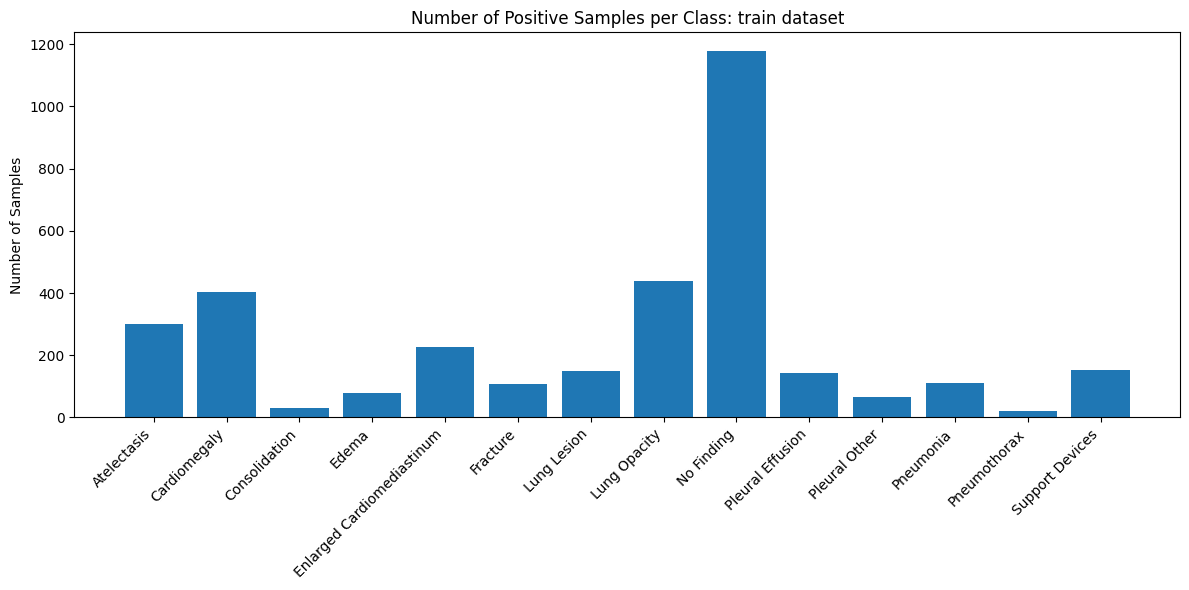

Split size: 385
Label counts:
Atelectasis: 41
Cardiomegaly: 49
Consolidation: 4
Edema: 12
Enlarged Cardiomediastinum: 29
Fracture: 14
Lung Lesion: 20
Lung Opacity: 55
No Finding: 148
Pleural Effusion: 13
Pleural Other: 6
Pneumonia: 10
Pneumothorax: 2
Support Devices: 18


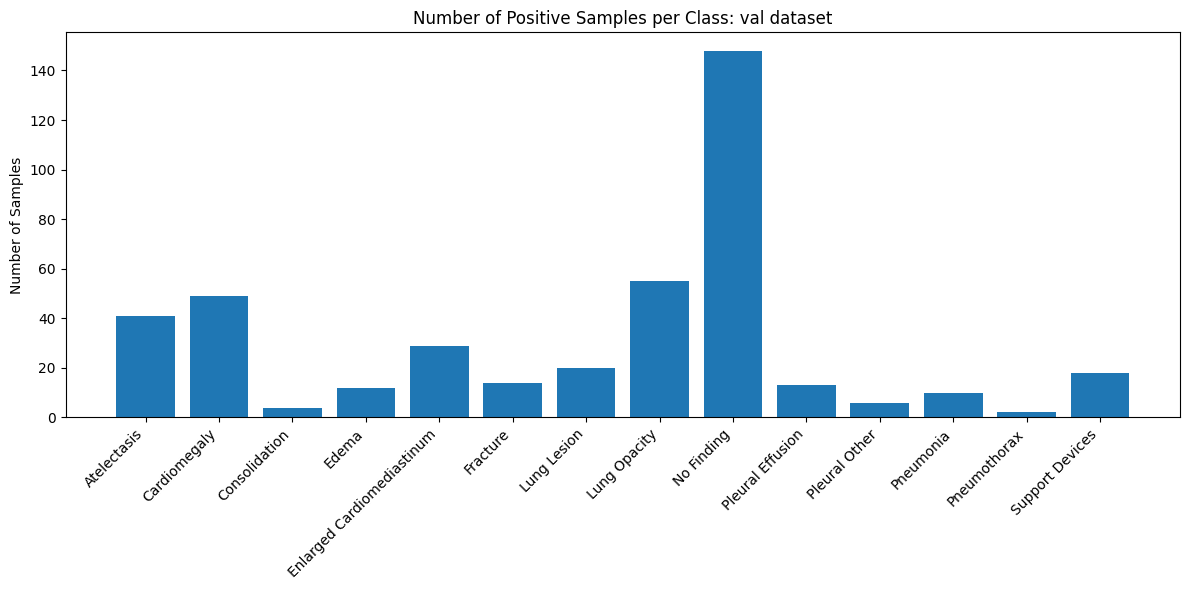

Split size: 385
Label counts:
Atelectasis: 34
Cardiomegaly: 53
Consolidation: 5
Edema: 12
Enlarged Cardiomediastinum: 27
Fracture: 15
Lung Lesion: 19
Lung Opacity: 57
No Finding: 148
Pleural Effusion: 19
Pleural Other: 8
Pneumonia: 12
Pneumothorax: 4
Support Devices: 18


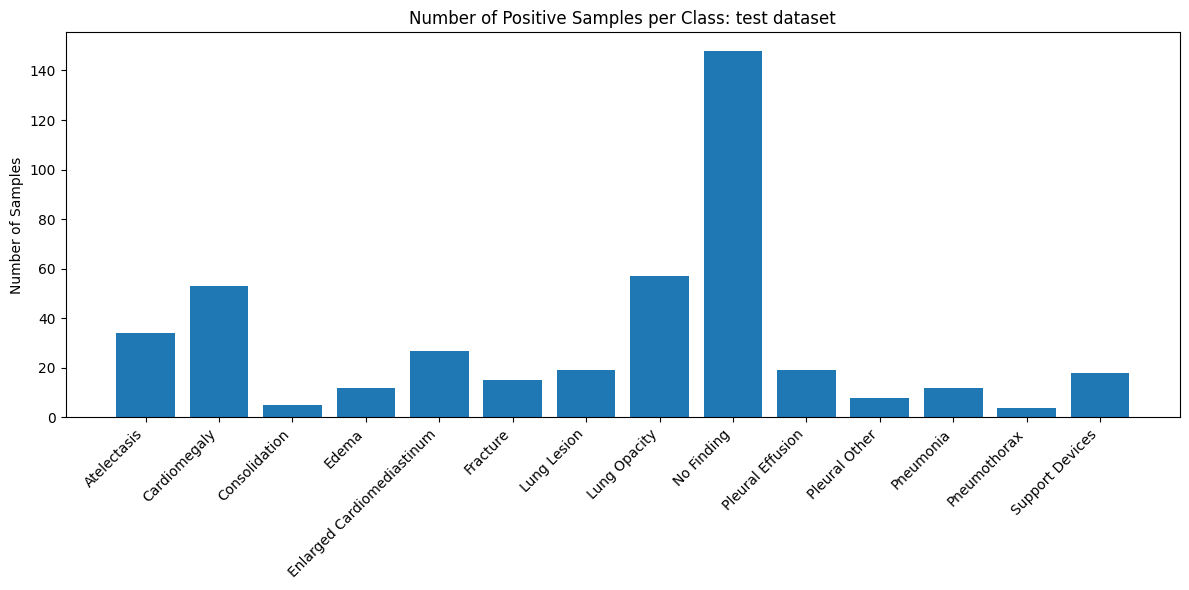

In [4]:
preprocessor = IUXrayPreprocessor()
iu_xray = preprocessor.preprocess()
print(f"Total samples: {len(iu_xray)}")
for split in ['train', 'val', 'test']:
    df_split = iu_xray[iu_xray['split'] == split]
    print(f"Split size: {len(df_split)}")
    plot_class_distribution(df_split, f"{split} dataset")

In [5]:
train_split = iu_xray[iu_xray['split'] == 'train']
train_split.to_csv(f'{DATA_PATH}/processed/iu_xray_train.csv', index=False)

val_split = iu_xray[iu_xray['split'] == 'val']
val_split.to_csv(f'{DATA_PATH}/processed/iu_xray_val.csv', index=False)

test_split = iu_xray[iu_xray['split'] == 'test']
test_split.to_csv(f'{DATA_PATH}/processed/iu_xray_test.csv', index=False)

iu_xray.to_csv(f'{DATA_PATH}/processed/iu_xray_processed.csv', index=False)

print("Splits saved successfully")

Splits saved successfully
